# Hours studied by students and the marks they got

## Import libraries and load the data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings ('ignore')

In [64]:
df = pd.read_csv ('score_updated.csv')

### Glancing at the data

In [65]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
df.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


### Plotting histograms

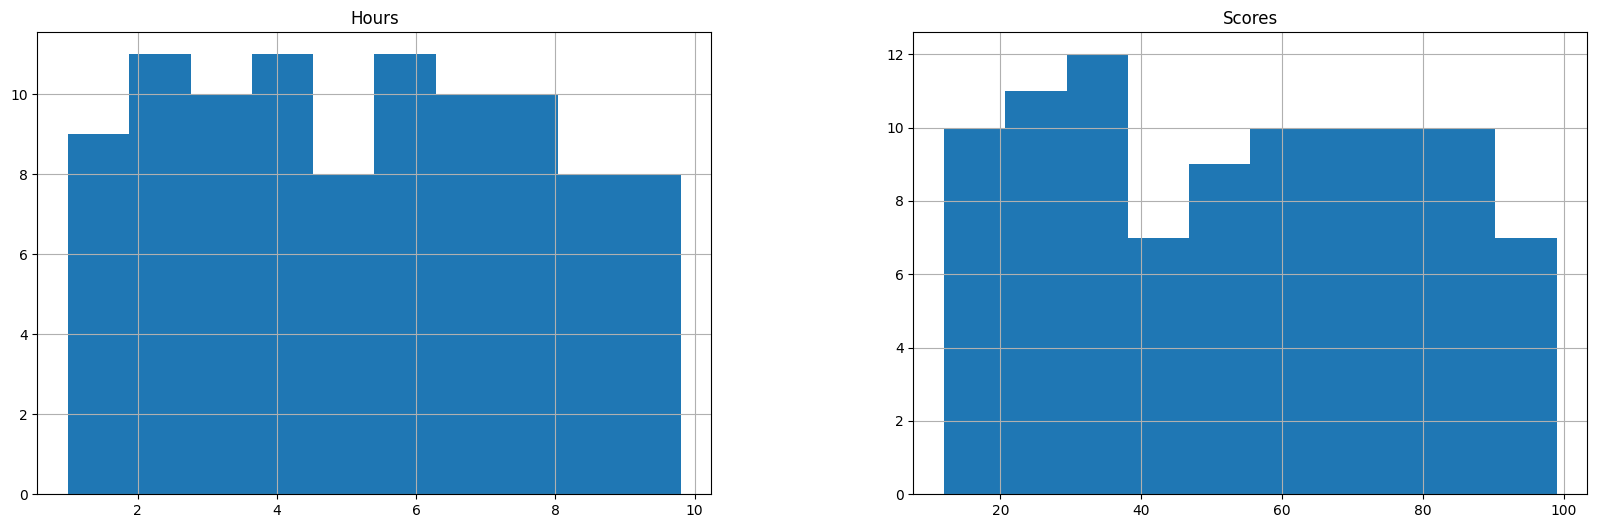

In [68]:
df.hist(bins=10, figsize= (20, 6))
plt.show()

## Splitting data into train and test

In [69]:
X = df.drop(columns = 'Scores', axis= 1)
y = df['Scores']

In [70]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 42)

## Plotting data

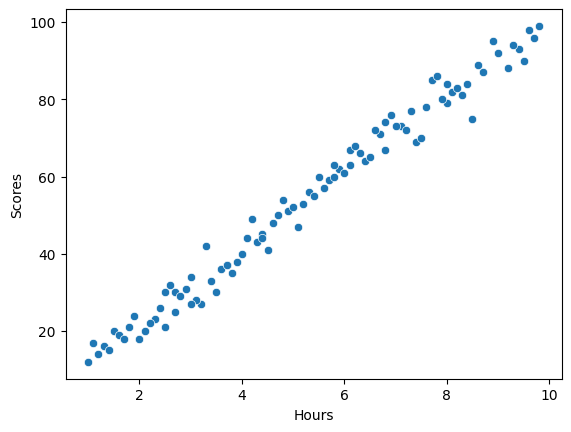

In [71]:
sns.scatterplot (data = df, x = 'Hours', y = 'Scores')
plt.show()

##### Straight forward correlation of Hours studied and Scores

In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)
train_predict = model.predict (X_train)

## Creating Linear Regression model

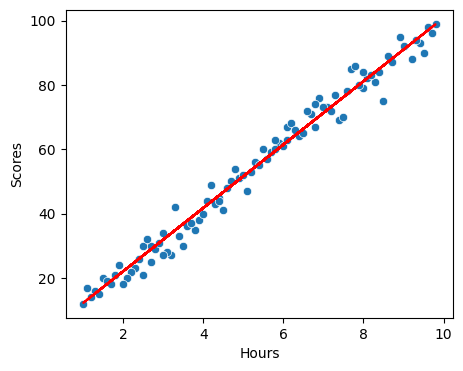

In [74]:
plt.figure (figsize= (5, 4))
sns.scatterplot (data = df, x = 'Hours', y = 'Scores')
plt.plot (X_train, train_predict, color = 'red')
plt.show()

In [75]:
linear_pred = model.predict (X_test)
linear_mse = mean_squared_error (y_test, linear_pred)
linear_rmse = np.sqrt (linear_mse)

In [76]:
linear_rmse

4.124008274830024

## Creating Decision tree model

In [77]:
model2 = DecisionTreeRegressor (random_state= 1)

In [78]:
model2.fit (X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [79]:
y_predict = model2.predict (X_test)
tree_mse = mean_squared_error (y_test, y_predict)
tree_rsme = np.sqrt (tree_mse)

In [80]:
tree_rsme

3.783186487605389

### Decision tree model having better accuracy than Linear Regression model, so I will go with that

#### Predicting score with Decision tree model

In [81]:
prediction2 = model2.predict([[5]])
print ("Student who studied for 5 hours got ", prediction2, " marks.")

Student who studied for 5 hours got  [47.]  marks.


#### Predicting score with Linear Regression model

In [82]:
prediction = model.predict([[5]])
print ("Student who stuided for 5 hours got ", prediction, " marks.")

Student who stuided for 5 hours got  [51.61874098]  marks.
